# ASSIGNMENT-1

# IMPORTING DATA FROM CSV FILE

In [0]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
df=pd.read_csv("/content/Kaggle_Salary.csv")

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (73,77,114,146,153,171,175,212,224,228,231) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
df.shape
#Total 7200 training pts to be present
#Minimum 5000 training points to be present

(12497, 248)

In [4]:
f=np.sum(df.isnull())
print(f)
# df.isnull()

Time from Start to Finish (seconds)        0
Q1                                         0
Q2                                         0
Q2_OTHER_TEXT                              0
Q3                                         0
                                       ...  
Q34_Part_11                            11252
Q34_Part_12                            12210
Q34_OTHER_TEXT                             0
Q10_Encoded                                0
Q10_buckets                                0
Length: 248, dtype: int64


In [5]:
P=(f/12497)*100
print(P)

r=[i for i in P>50] 
q=P.index[r]
print("\n COLUMNS WITH MORE THAN 50 PERCENT NAN VALUES=",len(q),"\n")
print(q)

Time from Start to Finish (seconds)     0.000000
Q1                                      0.000000
Q2                                      0.000000
Q2_OTHER_TEXT                           0.000000
Q3                                      0.000000
                                         ...    
Q34_Part_11                            90.037609
Q34_Part_12                            97.703449
Q34_OTHER_TEXT                          0.000000
Q10_Encoded                             0.000000
Q10_buckets                             0.000000
Length: 248, dtype: float64

 COLUMNS WITH MORE THAN 50 PERCENT NAN VALUES= 192 

Index(['Q9_Part_1', 'Q9_Part_2', 'Q9_Part_3', 'Q9_Part_4', 'Q9_Part_5',
       'Q9_Part_6', 'Q9_Part_7', 'Q9_Part_8', 'Q12_Part_1', 'Q12_Part_2',
       ...
       'Q34_Part_3', 'Q34_Part_4', 'Q34_Part_5', 'Q34_Part_6', 'Q34_Part_7',
       'Q34_Part_8', 'Q34_Part_9', 'Q34_Part_10', 'Q34_Part_11',
       'Q34_Part_12'],
      dtype='object', length=192)


# DATA CLEANING AND EXPLORATORY DATA ANALYSIS:

LETS CALCULATE THE NUMBER OF NAN VALUES PER COLUMN FOR THE GIVEN DATA SET

In [6]:
f=np.sum(df.isnull())

P=(f/12497)*100


r=[i for i in P>5] 
q=P.index[r]

q=np.array(q)
q.reshape(len(q),1)
print(len(q),'out of', len(f),"has more than 5 percent missing NAN values\n")
print("FOLLOWING ARE THE COLUMNS WITH MORE THAN 5 PERCENT MISSING VALUES\n",q)

207 out of 248 has more than 5 percent missing NAN values

FOLLOWING ARE THE COLUMNS WITH MORE THAN 5 PERCENT MISSING VALUES
 ['Q9_Part_1' 'Q9_Part_2' 'Q9_Part_3' 'Q9_Part_4' 'Q9_Part_5' 'Q9_Part_6'
 'Q9_Part_7' 'Q9_Part_8' 'Q12_Part_1' 'Q12_Part_2' 'Q12_Part_3'
 'Q12_Part_4' 'Q12_Part_5' 'Q12_Part_6' 'Q12_Part_7' 'Q12_Part_8'
 'Q12_Part_9' 'Q12_Part_10' 'Q12_Part_11' 'Q12_Part_12' 'Q13_Part_1'
 'Q13_Part_2' 'Q13_Part_3' 'Q13_Part_4' 'Q13_Part_5' 'Q13_Part_6'
 'Q13_Part_7' 'Q13_Part_8' 'Q13_Part_9' 'Q13_Part_10' 'Q13_Part_11'
 'Q13_Part_12' 'Q14' 'Q15' 'Q16_Part_1' 'Q16_Part_2' 'Q16_Part_3'
 'Q16_Part_4' 'Q16_Part_5' 'Q16_Part_6' 'Q16_Part_7' 'Q16_Part_8'
 'Q16_Part_9' 'Q16_Part_10' 'Q16_Part_11' 'Q16_Part_12' 'Q17_Part_1'
 'Q17_Part_2' 'Q17_Part_3' 'Q17_Part_4' 'Q17_Part_5' 'Q17_Part_6'
 'Q17_Part_7' 'Q17_Part_8' 'Q17_Part_9' 'Q17_Part_10' 'Q17_Part_11'
 'Q17_Part_12' 'Q18_Part_1' 'Q18_Part_2' 'Q18_Part_3' 'Q18_Part_4'
 'Q18_Part_5' 'Q18_Part_6' 'Q18_Part_7' 'Q18_Part_8' 'Q18_Part_9'


BY INSPECTION WE CAN FIND THAT IN THE ABOVE ARRAY EXCEPT FOR QUESTION **Q14,Q15,Q19,Q22,Q23** ALL OTHER COLUMNS ARE OPTIONS OF SOME SPECIFIC QUESTION. FOR THESE COLUMNS **ONE HOT ENCODING** CAN BE DONE TO REMOVE NAN VALUES.


In [7]:
#CREATING A LIST OF FEATURES FOR WHICH ONE HOT ENCODING HAS TO BE DONE
qq=list(set(q)-set(['Q14','Q15','Q22','Q23','Q19']))
qq=np.array(qq)
print("ONE HOT ENCODING HAS TO BE DONE FOR=",qq.shape[0],"FEATURES")

ONE HOT ENCODING HAS TO BE DONE FOR= 202 FEATURES


In [8]:
#ONE HOT ENCODING
test=pd.get_dummies(df[qq],prefix=qq )
print("ONE HOT ENCODED DATA",np.shape(test))
print("COLUMNS ENCODED",qq.shape)

ONE HOT ENCODED DATA (12497, 202)
COLUMNS ENCODED (202,)


IT CAN BE SEEN THAT 202 COLUMNS WERE ENCODED AND NO NEW COLUMNS WERE CREATED

In [9]:
#APPENDING THE ENCODED FEATURES
print("SHAPE BEFORE APPENDING THE ENCODED FEATURES",df.shape)
dfc=pd.concat([df,test],axis=1)
print("SHAPE AFTER APPENDING THE ENCODED FEATURES",dfc.shape)
dfc=dfc.drop(qq,axis=1)
print("SHAPE AFTER DROPING THE ORIGINAL FEATURES WHICH WERE ENCODED",dfc.shape)

SHAPE BEFORE APPENDING THE ENCODED FEATURES (12497, 248)
SHAPE AFTER APPENDING THE ENCODED FEATURES (12497, 450)
SHAPE AFTER DROPING THE ORIGINAL FEATURES WHICH WERE ENCODED (12497, 248)


IT CAN BE SEEN THAT THE FEATURE **LENGTH AFTER ENCODING IS SAME AS THE FEATURE LENGTH OF THE  ORIGINAL DATASET** WHICH MEANS THAT THE ONE HOT ENCODING DID NOT CREATE EXTRA COLUMNS FOR THE FEATURES THAT HAVE BEEN ENCODED. THIS IS BECAUSE THE FEATURES WHICH HAVE BEEN PASSES ARE OPTIONS OF MCQ'S AND THEY WILL HAVE ONLY ONE OPTION, IF THE PERSON HAS NOT CHOOSEN THE OPTION THEN THE COLUMN WILL HAVE A NAN ENTRY. NOW BY USING ONE HOT ENCODING WE HAVE CONVERTED THE NAN VALUES TO ZERO 

NOW LETS LOOK AT COLUMNS WHICH HAVE NAN ENTRIES

In [10]:
w=np.sum(dfc.isnull())
w1=[i for i in w>1]
print("\nCOLUMNS WITH NAN ENTERIES\n",np.array(w[w1].index))


COLUMNS WITH NAN ENTERIES
 ['Q11' 'Q14' 'Q15' 'Q19' 'Q22' 'Q23']


BEFORE WE GO AND INSPECT THE COLUMNS WITH NAN VALUES **LETS ENCODE A COLUMN FOR MEDIAN SALARY FOR EACH SAMPLE** FROM THE SALARY BUCKET SO THAT WE CAN **COMPARE DIFFERENT FEATURES WITH RESPECT TO SALARY**

In [11]:
dfc['Q10'].unique()

array(['30,000-39,999', '5,000-7,499', '250,000-299,999', '4,000-4,999',
       '60,000-69,999', '10,000-14,999', '80,000-89,999', '$0-999',
       '2,000-2,999', '70,000-79,999', '90,000-99,999', '125,000-149,999',
       '40,000-49,999', '20,000-24,999', '15,000-19,999',
       '100,000-124,999', '7,500-9,999', '150,000-199,999',
       '25,000-29,999', '3,000-3,999', '1,000-1,999', '200,000-249,999',
       '50,000-59,999', '> $500,000', '300,000-500,000'], dtype=object)

In [0]:
d={'30,000-39,999':35000, 
   '5,000-7,499':6250,
   '250,000-299,999':275000,
   '4,000-4,999':4500,
   '60,000-69,999':65000,
   '10,000-14,999':12500,
   '80,000-89,999':85000,
   '$0-999':500,
   '2,000-2,999':2500,
   '70,000-79,999':75000,
   '90,000-99,999':95000,
   '125,000-149,999':137500,
   '40,000-49,999':45000,
   '20,000-24,999':22500,
   '15,000-19,999':17500,
   '100,000-124,999':112500,
   '7,500-9,999':8750,
   '150,000-199,999':175000,
   '25,000-29,999':27500,
   '3,000-3,999':3500,
   '1,000-1,999':1500,
   '200,000-249,999':225000,
   '50,000-59,999':55000,
   '> $500,000':600000,
   '300,000-500,000':400000}

In [0]:
dfc['Q10_median']=dfc['Q10'].map(d)

In [0]:
dfc=dfc.drop("Q10",axis=1)

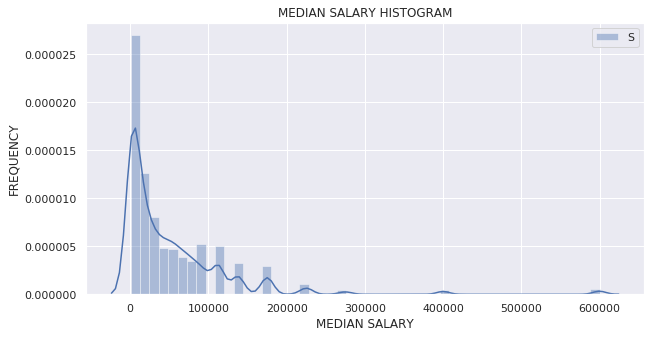

In [15]:
sns.set(rc={'figure.figsize':(10,5)})
sns.distplot(dfc['Q10_median']);
plt.xlabel("MEDIAN SALARY")
plt.ylabel("FREQUENCY")
plt.title("MEDIAN SALARY HISTOGRAM")
plt.legend("SALARY DIST")
plt.show()



FROM THE HISTOGRAM IT CAN BE SEEN THAT A VAST MAJORITY OF DATA SCIENTIST HAVE INCOME BELOW 100 THOUSAND DOLLARS.  
   
THE FREQUENCY IN DISTRIBUTION DECRESES DRASTICALLY AFTER 100 THOUSAND DOLLARS, IT MAYBE BECAUSE DOLLAR IS A VERY STRONG CURRENCY INTERNATIONALY AND ONLY COMPANIES IN DEVELOPED COUNTRIES CAN GIVE MORE THAN 100K DOLLARS FOR ITS TOP DATA SCIENTIST. DEVELOPING AND UNDEVELOPED COUNTRIES MAY HAVE HIGH QUALITY DATA SCIENTIST BUT WHEN THIER SALARY WHEN CONVETED TO DOLLARS MIGHT FALL BELOW 100K DOLLARS. 
     
WE CAN ALSO SEE A SLIGHT BUMP IN 400K AND 600K RANGE, THESE DATA ARE OUTLIERS, THEY MAY BE WRONG ENTRIES OR FAKE DISCLOSURES

# Q11	
Approximately how much money have you spent on machine learning and/or cloud computing products at your work in the past 5 
years?

In [16]:
l11=dfc['Q11'].unique()
print("Unique elements in the column Q11\n",l11)

Unique elements in the column Q11
 ['$0 (USD)' '> $100,000 ($USD)' '$10,000-$99,999' '$100-$999'
 '$1000-$9,999' '$1-$99' nan]


In [17]:
sal=dfc.groupby(['Q11'])['Q10_median'].mean()
print(sal)

Q11
$0 (USD)              40955.856860
$1-$99                26506.902357
$10,000-$99,999       86460.567823
$100-$999             38658.458244
$1000-$9,999          55848.563354
> $100,000 ($USD)    128914.085914
Name: Q10_median, dtype: float64


In [18]:
sal=dfc.groupby(['Q11'])['Q10_median'].median()
print(sal)

Q11
$0 (USD)             22500
$1-$99                8750
$10,000-$99,999      65000
$100-$999            17500
$1000-$9,999         35000
> $100,000 ($USD)    95000
Name: Q10_median, dtype: int64


BY INSPECTING THE MEAN AND MEDIAN WE CAN SAY THAT THE AMOUNT SPENT ON MACHINE LEARNING HAS A DIRECT CORRELATION WITH THE SALARY EXCEPT FOR CATEGORY  $0 (USD)
   
LETS LABEL ENCODE THE STRINGS SO THAT WE CAN PASS IT ML ALGO 

In [0]:
l11_encoded={'$0 (USD)':0,'> $100,000 ($USD)':5,'$10,000-$99,999':4,'$100-$999':2,'$1000-$9,999':3,'$1-$99':1}

In [20]:
print("\n Q11 head before encoding\n",dfc['Q11'].head())
dfc['Q11_e']=dfc["Q11"].map(l11_encoded)
print("\n Unique values in Q11_e\n",dfc['Q11_e'].unique())

print("\n Q11 head after encoding\n",dfc['Q11_e'].head())


 Q11 head before encoding
 0             $0 (USD)
1    > $100,000 ($USD)
2      $10,000-$99,999
3             $0 (USD)
4      $10,000-$99,999
Name: Q11, dtype: object

 Unique values in Q11_e
 [ 0.  5.  4.  2.  3.  1. nan]

 Q11 head after encoding
 0    0.0
1    5.0
2    4.0
3    0.0
4    4.0
Name: Q11_e, dtype: float64


There are still **NAN values** in the columns  
Lets **impute with values with median** of the column  

In [21]:
print("Median of the column Q11_e=",dfc['Q11_e'].median())

Median of the column Q11_e= 2.0


In [22]:
# Imputing the NAN values with median of the column 
dfc["Q11_e"]=dfc["Q11_e"].fillna(dfc["Q11_e"].median())
print((dfc["Q11_e"].unique()).astype(int))

[0 5 4 2 3 1]


In [23]:
#Checking for NAN values in the encoded column
print("No of NAN values in column Q11=",np.sum(dfc["Q11_e"].isnull()))

No of NAN values in column Q11= 0


In [24]:
# Since we have the encoded feature of Q11 as Q11_e, lets drop Q11 column
dfc=dfc.drop('Q11',axis=1)
print("Shape after encoding",dfc.shape)

Shape after encoding (12497, 248)


# Q14
What is the primary tool that you use at work or school to analyze data? (Include text response) - Selected Choice

HERE MORE THAN 1 CHOISES CAN BE SELECTED BY A PERSON SO THE FEATURE CONTAINS MANY DIFFERENT TYPES OF SENTENCES

In [25]:
print(dfc["Q14"].unique())

['Basic statistical software (Microsoft Excel, Google Sheets, etc.)'
 'Cloud-based data software & APIs (AWS, GCP, Azure, etc.)'
 'Local development environments (RStudio, JupyterLab, etc.)'
 'Advanced statistical software (SPSS, SAS, etc.)' 'Other'
 'Business intelligence software (Salesforce, Tableau, Spotfire, etc.)'
 nan]


In [26]:
print(dfc["Q14"].value_counts())

Local development environments (RStudio, JupyterLab, etc.)              5925
Basic statistical software (Microsoft Excel, Google Sheets, etc.)       2094
Cloud-based data software & APIs (AWS, GCP, Azure, etc.)                1033
Other                                                                    871
Business intelligence software (Salesforce, Tableau, Spotfire, etc.)     787
Advanced statistical software (SPSS, SAS, etc.)                          742
Name: Q14, dtype: int64


FOR THIS COLUMN WE CAN USE LABLE ENCODER OR ONE HOT ENCODER 
THE PROBLEM WITH USING LABLE ENCODER IS THAT WHEN WE PASS IT THROUGH A DATASCIENCE ALGO THE LABLES MAY GET ASSIGNED PRIORITY BASED ON ITS VALUE. SO WE WILL GO WITH ONE HOT ENCODING 

In [27]:
# dfc["Q14_1"]=dfc["Q14"].fillna(0)
print("Shape before encoding",dfc.shape)
testQ14=pd.get_dummies(dfc["Q14"],prefix="Q14")
dfc=pd.concat([dfc,testQ14],axis=1)
# print(dfc.shape)
dfc=dfc.drop("Q14",axis=1)
print("Shape after encoding",dfc.shape)

Shape before encoding (12497, 248)
Shape after encoding (12497, 253)


# Q15	
How long have you been writing code to analyze data (at work or at school)?

In [28]:
dfc["Q15"].unique()

array(['1-2 years', 'I have never written code', '< 1 years', '20+ years',
       '3-5 years', '5-10 years', '10-20 years', nan], dtype=object)

Lets encode the data with the medium of the data

In [0]:
l15_encoded={'1-2 years': 1.5, 'I have never written code':0, '< 1 years':6, '20+ years':20,
       '3-5 years':4, '5-10 years':7.5, '10-20 years':15, np.nan:np.nan}

In [30]:
dfc["Q15_e"]= dfc["Q15"].map(l15_encoded)
print("Unique values before encoding",dfc["Q15_e"].unique())

Unique values before encoding [ 1.5  0.   6.  20.   4.   7.5 15.   nan]


There are still NAN values  
Lets encode them with the median

In [31]:
print("Median of the data",dfc["Q15_e"].median())
dfc["Q15_e"]=dfc["Q15_e"].fillna(dfc["Q15_e"].median())
print("Unique values after encoding",dfc["Q15_e"].unique())

Median of the data 4.0
Unique values after encoding [ 1.5  0.   6.  20.   4.   7.5 15. ]


In [32]:
print("\n Q15 shape before encoding the column",dfc.shape)
dfc=dfc.drop("Q15",axis=1)
print("\n Q15 shape after encoding the column",dfc.shape)


 Q15 shape before encoding the column (12497, 254)

 Q15 shape after encoding the column (12497, 253)


In [33]:
print("No of null values in the column=",np.sum(dfc["Q15_e"].isnull()))

No of null values in the column= 0


# Q19 
What programming language would you recommend an aspiring data scientist to learn first? - Selected Choice

In [34]:
dfc["Q19"].unique()

array(['Python', nan, 'Java', 'R', 'SQL', 'C++', 'None', 'Other', 'C',
       'MATLAB', 'TypeScript', 'Javascript', 'Bash'], dtype=object)

In [35]:
print(dfc["Q19"].value_counts())
print("NaN",np.sum(dfc["Q19"].isnull()))


Python        8200
R             1073
SQL            736
C++            128
MATLAB         115
Other          113
C               84
Java            70
None            61
Javascript      37
Bash            31
TypeScript       5
Name: Q19, dtype: int64
NaN 1844


LETS REPLACE NAN WITH Python  SINCE IT HAS BEEN SELECTED BY MOST PEOPLE IN THE SURVEY
THERE IS A MOJOR DIFFERENCE BETWEEN THE COUNTS OF PYTHON AND THE REST OF THE DATA

In [36]:
dfc["Q19"]=dfc["Q19"].fillna("Python")
print(dfc["Q19"].value_counts())


Python        10044
R              1073
SQL             736
C++             128
MATLAB          115
Other           113
C                84
Java             70
None             61
Javascript       37
Bash             31
TypeScript        5
Name: Q19, dtype: int64


In [37]:
print("NaN COUNTS=",np.sum(dfc["Q19"].isnull()))

NaN COUNTS= 0


LETS LABEL ENCODE THE DATA BECAUSE THERE ARE 11 VARIABLES IN THE COLUMN AND ONE HOT ENCODING GENERATES 11 SEPERATE FEATURES FOR THIS SPECIFIC COLUMN

In [38]:
#label Encoding
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
dfc["Q19_le"]= labelencoder.fit_transform(dfc["Q19"])
print("COUNTS AFTER LABEL ENCODING\n",dfc["Q19_le"].value_counts())

COUNTS AFTER LABEL ENCODING
 8     10044
9      1073
10      736
2       128
5       115
7       113
1        84
3        70
6        61
4        37
0        31
11        5
Name: Q19_le, dtype: int64


In [39]:
dfc=dfc.drop("Q19",axis=1)
print("Shape of data frame after encoding",dfc.shape)

Shape of data frame after encoding (12497, 253)


# Q22 
Have you ever used a TPU (tensor processing unit)?

In [40]:
dfc["Q22"].unique()

array(['Never', nan, 'Once', '6-24 times', '2-5 times', '> 25 times'],
      dtype=object)

In [41]:
v=dfc["Q22"].value_counts()
print("Percentage of the data in each category\n",(v/np.sum(v))*100)

Percentage of the data in each category
 Never         80.682464
Once           9.251185
2-5 times      7.535545
6-24 times     1.374408
> 25 times     1.156398
Name: Q22, dtype: float64


WE CAN SEE THAT 80 PERCENT OF PEOPLE IN DATASET NEVER USED THE TPU  
SO WE REPLACE THE NAN VALUES WITH NEVER

In [42]:
print("nan=",np.sum(dfc["Q22"].isnull()))

nan= 1947


In [0]:
dfc["Q22"]=dfc["Q22"].fillna("Never")

In [44]:
sal=dfc.groupby(['Q22'])['Q10_median'].mean()
print(sal)

Q22
2-5 times      54478.301887
6-24 times     63336.206897
> 25 times    111053.278689
Never          52364.757625
Once           48796.106557
Name: Q10_median, dtype: float64


In [45]:
sal=dfc.groupby(['Q22'])['Q10_median'].median()
print(sal)

Q22
2-5 times     27500
6-24 times    35000
> 25 times    55000
Never         27500
Once          22500
Name: Q10_median, dtype: int64


It can be seen that people who have used TPU "greater than 25 times" have significantly higher mean and median salaries compared to the rest     
So we can **feature engineer** the column into **2 categories** 

In [0]:
tpu_e={"2-5 times":0,
"6-24 times":0,
"> 25 times":25,
"Never":0,
"Once":0}

In [47]:
dfc["Q22_e"]=dfc["Q22"].map(tpu_e)
print("Unique values in the column after encoding",dfc["Q22_e"].unique())

Unique values in the column after encoding [ 0 25]


In [48]:
dfc=dfc.drop(["Q22"],axis=1)
print("Shape after encoding",dfc.shape)

Shape after encoding (12497, 253)


In [49]:
print("NAN counts=",np.sum(dfc["Q22_e"].isnull()))

NAN counts= 0


# Q23 
For how many years have you used machine learning methods?

In [50]:
dfc["Q23"].unique()

array(['1-2 years', nan, '2-3 years', '< 1 years', '10-15 years',
       '3-4 years', '4-5 years', '5-10 years', '20+ years'], dtype=object)

Lets encode the data with the median of the years mentioned in the sample

In [0]:
l23_encoded={'1-2 years':1.5, np.nan:np.nan, '2-3 years':2.5, '< 1 years':0.6, '10-15 years':12.5,
       '3-4 years':3.5, '4-5 years':4.5, '5-10 years':7.5, '20+ years':20}

In [52]:
dfc["Q23_e"]=dfc["Q23"].map(l23_encoded)
print("Unique data after encoding",dfc["Q23_e"].unique())
# print(dfc["Q23_e"].value_counts())

Unique data after encoding [ 1.5  nan  2.5  0.6 12.5  3.5  4.5  7.5 20. ]


In [53]:
print("NAN counts=",np.sum(dfc["Q23"].isnull()))

NAN counts= 1956


Lets fill the NAN values with the median of whole Data set

In [54]:
dfc["Q23_e"]=dfc["Q23_e"].fillna(dfc["Q23_e"].median())
print(dfc["Q23_e"].median())
dfc["Q23_e"].unique()

1.5


array([ 1.5,  2.5,  0.6, 12.5,  3.5,  4.5,  7.5, 20. ])

In [55]:
print("NAN counts=",np.sum(dfc["Q23_e"].isnull()))

NAN counts= 0


In [56]:
dfc=dfc.drop("Q23",axis=1)
print("Shape of Dataset",dfc.shape)

Shape of Dataset (12497, 253)


# OTHER TEXT COLUMNS:

In [0]:
# print(np.array(dfc.columns))

By inspection of columns in the dataset we can find that there are many "other text columns" which contains no useful information   
So lets drop these columns 

In [58]:
#columns to be deleted
l_d=['Q2_OTHER_TEXT','Q5_OTHER_TEXT','Q9_OTHER_TEXT','Q12_OTHER_TEXT','Q13_OTHER_TEXT','Q14_Part_1_TEXT','Q14_Part_2_TEXT',
     'Q14_Part_3_TEXT','Q14_Part_4_TEXT','Q14_Part_5_TEXT','Q14_OTHER_TEXT','Q16_OTHER_TEXT','Q17_OTHER_TEXT',
     'Q18_OTHER_TEXT','Q19_OTHER_TEXT','Q20_OTHER_TEXT','Q21_OTHER_TEXT','Q24_OTHER_TEXT','Q25_OTHER_TEXT',
 'Q26_OTHER_TEXT','Q27_OTHER_TEXT','Q28_OTHER_TEXT','Q29_OTHER_TEXT','Q30_OTHER_TEXT','Q31_OTHER_TEXT','Q32_OTHER_TEXT',
     'Q33_OTHER_TEXT', 'Q34_OTHER_TEXT']
print("No of columns to be deleted=",len(l_d))

No of columns to be deleted= 28


In [59]:
dfc=dfc.drop(l_d,axis=1)
print("Shape of the dataset after deleting the columns",dfc.shape)

Shape of the dataset after deleting the columns (12497, 225)


# NOW LETS CHECK IF THERE ARE ANY MISSING NAN VALUES IN THE DATASET

In [60]:
print("NAN VALUES IN DATASET=",np.sum(np.sum(dfc.isnull())))

NAN VALUES IN DATASET= 0


In [61]:
dfc.head()

,Time from Start to Finish (seconds),Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q10_Encoded,Q10_buckets,Q29_Part_7_ Oracle Cloud,Q9_Part_1_Analyze and understand data to influence product or business decisions,Q9_Part_3_Build prototypes to explore applying machine learning to new areas,Q33_Part_3_ Databricks AutoML,"Q25_Part_1_Automated data augmentation (e.g. imgaug, albumentations)",Q33_Part_1_ Google AutoML,Q30_Part_6_Google Cloud Functions,Q20_Part_1_ Ggplot / ggplot2,Q16_Part_4_ Atom,Q24_Part_12_Other,"Q27_Part_1_Word embeddings/vectors (GLoVe, fastText, word2vec)",Q16_Part_8_ Vim / Emacs,Q13_Part_9_LinkedIn Learning,Q28_Part_5_ Xgboost,Q32_Part_7_Google Cloud Natural Language,Q30_Part_8_Google Kubernetes Engine,Q13_Part_6_Kaggle Courses (i.e. Kaggle Learn),Q18_Part_7_Javascript,"Q27_Part_3_Contextualized embeddings (ELMo, CoVe)",Q32_Part_3_Azure Machine Learning Studio,Q16_Part_6_ Visual Studio / Visual Studio Code,Q13_Part_1_Udacity,Q24_Part_5_Evolutionary Approaches,Q34_Part_10_Google Cloud SQL,Q31_Part_2_AWS Redshift,Q17_Part_3_ Microsoft Azure Notebooks,Q12_Part_12_Other,Q32_Part_11_None,Q21_Part_2_GPUs,...,Q28_Part_4_ RandomForest,Q26_Part_6_None,Q34_Part_11_None,"Q12_Part_10_Slack Communities (ods.ai, kagglenoobs, etc)",Q21_Part_3_TPUs,"Q17_Part_10_AWS Notebook Products (EMR Notebooks, Sagemaker Notebooks, etc)",Q33_Part_12_Other,Q16_Part_2_ RStudio,Q20_Part_8_ Seaborn,"Q27_Part_4_Transformer language models (GPT-2, BERT, XLnet, etc)",Q29_Part_3_ Microsoft Azure,Q30_Part_12_Other,Q21_Part_4_None / I do not know,Q29_Part_1_ Google Cloud Platform (GCP),Q32_Part_12_Other,Q18_Part_4_C,Q30_Part_2_Google Compute Engine (GCE),Q29_Part_5_ Alibaba Cloud,Q21_Part_5_Other,Q20_Part_4_ Shiny,Q32_Part_5_Google Cloud Vision,"Q26_Part_5_Generative Networks (GAN, VAE, etc)",Q34_Part_5_Oracle Database,Q18_Part_12_Other,Q17_Part_12_Other,Q30_Part_1_AWS Elastic Compute Cloud (EC2),Q24_Part_9_Recurrent Neural Networks,Q18_Part_9_Bash,Q10_median,Q11_e,"Q14_Advanced statistical software (SPSS, SAS, etc.)","Q14_Basic statistical software (Microsoft Excel, Google Sheets, etc.)","Q14_Business intelligence software (Salesforce, Tableau, Spotfire, etc.)","Q14_Cloud-based data software & APIs (AWS, GCP, Azure, etc.)","Q14_Local development environments (RStudio, JupyterLab, etc.)",Q14_Other,Q15_e,Q19_le,Q22_e,Q23_e
0,510,22-24,Male,France,Master’s degree,Software Engineer,"1000-9,999 employees",0,I do not know,3,"30,000-39,999",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,35000,0.0,0,1,0,0,0,0,1.5,8,0,1.5
1,423,40-44,Male,India,Professional degree,Software Engineer,"> 10,000 employees",20+,"We have well established ML methods (i.e., mod...",0,"0-9,999",0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,6250,5.0,0,0,0,1,0,0,0.0,8,0,1.5
2,391,40-44,Male,Australia,Master’s degree,Other,"> 10,000 employees",20+,I do not know,14,">250,000",0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,1,...,1,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,275000,4.0,0,0,0,0,1,0,1.5,8,0,2.5
3,392,22-24,Male,India,Bachelor’s degree,Other,0-49 employees,0,No (we do not use ML methods),0,"0-9,999",0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,...,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4500,0.0,0,0,0,0,1,0,6.0,8,0,0.6
4,470,50-54,Male,France,Master’s degree,Data Scientist,0-49 employees,3-4,"We have well established ML methods (i.e., mod...",6,"60,000-69,999",0,0,1,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,...,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,65000,4.0,1,0,0,0,0,0,20.0,3,0,12.5


EVENTHOUGH THERE ARE NO NAN VALUES BY INSPECTING THE DATASET WE CAN SAY THAT THE COLUMNS FROM THE START TILL Q8 HAS TO BE ENCODED

# Q3:COUNTRIES

In [0]:
sal=dfc.groupby(['Q3'])['Q10_median'].mean()
sal4=sal.sort_values()
# print(sal1)
e=dfc["Q3"].value_counts().sort_index()

In [1]:
sns.set(rc={'figure.figsize':(10,20)})
sns.barplot(x=sal4.values,y=sal4.index)
plt.xlabel("MEDIAN SALARY")
plt.ylabel("COUNTRIES")
plt.title("MEDIAN SALARY FOR DIFFERENT COUNTRIES")
plt.show()


NameError: ignored

IT CAN BE SEEN FROM THE BAR PLOT THAT DATA SCIENTIST LIVING IN DIFFERENT COUNTRIES HAVE DIFFERENT INCOME BASED ON THE ECONOMY OF THE COUNTRY. SINCE THERE IS A LARGE NO OF COUNTRIES IN OUR DATASET WE WILL GROUP THEM INTO 3 CATEGORIES BASED ON INCOME
- HIGH INCOME   
- MEDIUM INCOME   
- LOW INCOME

# HIGH INCOME: >50000 USD
France,Sweden, Austria,  Saudi Arabia, Ireland,  Netherlands,  Hong Kong(S.A.R.),Singapore,Belgium,Germany,Canada,New Zealand,United Kingdom of Great Britain and Northern Ireland,Denmark,Norway,Israel,Switzerland,Australia,United States of America                                   

# MEDIUM INCOME: >25k and <50K USD

Ukraine,Czech Republic,Romania,                                        Philippines,Greece,Brazil,Other,Portugal,Chile,China,Republic of Korea,Taiwan,Hungary,Poland,Spain,South Africa,South Korea,Italy,Japan                                                  

# LOW INCOME: <25K USD

Algeria,Iran, Islamic Republic of...Nigeria,Pakistan,Indonesia,Peru,         Morocco,Viet Nam,Bangladesh,Kenya,Egypt,Argentina,Turkey,Belarus,        Tunisia,Colombia,India,Malaysia,Mexico,                                   Thailand,Russia,                                                   

In [0]:
c_en={"France": "HI","Sweden": "HI","Austria":"HI","Saudi Arabia" :"HI","Ireland":"HI",
       "Netherlands":"HI","Hong Kong (S.A.R.)":"HI","Singapore":"HI","Belgium":"HI",
       "Germany":"HI","Canada":"HI","New Zealand":"HI","United Kingdom of Great Britain and Northern Ireland":"HI",
       "Denmark":"HI","Norway":"HI","Israel":"HI","Switzerland":"HI","Australia":"HI","United States of America":"HI",
        "Ukraine":"MI","Czech Republic":"MI","Romania":"MI","Philippines":"MI","Greece":"MI","Brazil":"MI","Other":"MI",
        "Portugal":"MI","Chile":"MI","China":"MI","Republic of Korea":"MI","Taiwan":"MI","Hungary":"MI","Poland":"MI",
        "Spain":"MI","South Africa":"MI","South Korea":"MI","Italy":"MI","Japan":"MI","Algeria":"LI","Iran, Islamic Republic of...":"LI",
        "Nigeria":"LI","Pakistan":"LI","Indonesia":"LI","Peru":"LI","Morocco":"LI","Viet Nam":"LI","Bangladesh":"LI",
        "Kenya":"LI","Egypt":"LI","Argentina":"LI", "Turkey":"LI", "Belarus":"LI","Tunisia":"LI","Colombia":"LI","India":"LI",
        "Malaysia":"LI","Mexico":"LI","Thailand":"LI","Russia":"LI"}

In [65]:
dfc["Q3_en"]=dfc["Q3"].map(c_en)
print(dfc["Q3_en"].value_counts())

LI    4526
HI    4399
MI    3572
Name: Q3_en, dtype: int64


Now the encoded country column has only 3 categories based on average income of data analyst in the country

In [66]:
c_en1={"HI":2,
      "MI":1,
      "LI":0}
dfc["Q3_en"]=dfc["Q3_en"].map(c_en1)
print(dfc["Q3_en"].value_counts())

0    4526
2    4399
1    3572
Name: Q3_en, dtype: int64


 HI HAS BEEN MAPPED TO 2    
 MI HAS BEEN MAPPED TO 1   
 LI HAS BEEN MAPPED TO 0   

In [67]:
dfc=dfc.drop("Q3",axis=1)
print("Shape after encoding Q3",dfc.shape)

Shape after encoding Q3 (12497, 225)


ALMOST ALL FEATURES IN THE DATASET HAS BEEN ENCODED AND CAN BE READILY FED TO ML ALGO EXCEPT THE FOLLOWING FEATURES
 
'Q1' 'Q2' 'Q4' 'Q5' 'Q6' 'Q7'
'Q8' 'Q10' 

LETS DO SOME EXPLORATORY DATA ANALYSIS BEFORE ENCODING THE ABOVE COLUMNS 

# SALARIES BY GENDER

In [68]:
sal=dfc.groupby(['Q2'])['Q10_median'].median()
print("\nMEDIAN",sal)
print("\nMEAN",dfc.groupby(['Q2'])['Q10_median'].mean())
print("\nCOUNTS",dfc['Q2'].value_counts())


MEDIAN Q2
Female                     17500
Male                       27500
Prefer not to say          35000
Prefer to self-describe    70000
Name: Q10_median, dtype: int64

MEAN Q2
Female                      41891.351943
Male                        54445.645947
Prefer not to say           66988.023952
Prefer to self-describe    113958.333333
Name: Q10_median, dtype: float64

COUNTS Male                       10473
Female                      1827
Prefer not to say            167
Prefer to self-describe       30
Name: Q2, dtype: int64


It can be seen that the category "Prefer to self describe" has almost twice the man and median of the rest of the categories and also the no of data in "Prefer to self-describe" is very less. So we are going to drop these rows

In [69]:
index=dfc[dfc["Q2"]=="Prefer to self-describe"].index
dfc=dfc.drop(index,axis=0)
print(dfc["Q2"].unique())

['Male' 'Female' 'Prefer not to say']


Similarly the no of sapes in the category 'Prefer not to say' is very less so we are going to drop this category

In [0]:
index=dfc[dfc["Q2"]=='Prefer not to say'].index
dfc=dfc.drop(index,axis=0)

Now Lets plot the distribution of salaries amounf male and female in countries with different income ranges

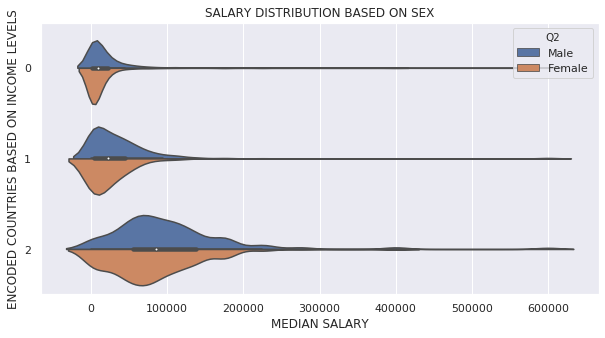

In [71]:
sns.set(rc={'figure.figsize':(10,5)})
sns.violinplot(x="Q10_median", y="Q3_en", data=dfc,hue='Q2',split=True,orient="h")
plt.xlabel("MEDIAN SALARY")
plt.ylabel("ENCODED COUNTRIES BASED ON INCOME LEVELS")
plt.title("SALARY DISTRIBUTION BASED ON SEX")
plt.show()

In the violinplot we can observe that the ditribution of salary for females fall at the higher end of greater than 200 thousand even in **HIGH INCOME(2)** developed countries compared to male counterparts.  
This implies there are less females in the at the top of corporate ladder compard to male counterparts.   
This imbalance is much more prominent in **MEDIUM INCOME(1)** and **LOW INCOME(0)** countries   

In [72]:
#ONE HOT ENCODING
print(dfc.shape)
testQ2=pd.get_dummies(dfc["Q2"],prefix="Q2")
dfc=pd.concat([dfc,testQ2],axis=1)
print(dfc.shape)


(12300, 225)
(12300, 227)


# BY DEGREE

In [73]:
sal=dfc.groupby(['Q4'])['Q10_median'].mean()
print(sal)

Q4
Bachelor’s degree                                                    41506.624511
Doctoral degree                                                      70221.718903
I prefer not to answer                                               36268.181818
Master’s degree                                                      53992.837418
No formal education past high school                                 56694.214876
Professional degree                                                  48480.263158
Some college/university study without earning a bachelor’s degree    44196.384040
Name: Q10_median, dtype: float64


In [74]:
dfc["Q4"].value_counts()

Master’s degree                                                      5794
Bachelor’s degree                                                    3321
Doctoral degree                                                      2042
Professional degree                                                   456
Some college/university study without earning a bachelor’s degree     401
I prefer not to answer                                                165
No formal education past high school                                  121
Name: Q4, dtype: int64

For this model we consider people with atleast some degree.   
So we are also going to drop people the categories in which the sample has not completed any degree

In [75]:
index=dfc[dfc["Q4"]=="Some college/university study without earning a bachelor’s degree"].index
dfc=dfc.drop(index,axis=0)
print(dfc["Q4"].unique())

['Master’s degree' 'Professional degree' 'Bachelor’s degree'
 'Doctoral degree' 'I prefer not to answer'
 'No formal education past high school']


In [76]:
index=dfc[dfc["Q4"]=="No formal education past high school"].index
dfc=dfc.drop(index,axis=0)
print(dfc["Q4"].unique())

['Master’s degree' 'Professional degree' 'Bachelor’s degree'
 'Doctoral degree' 'I prefer not to answer']


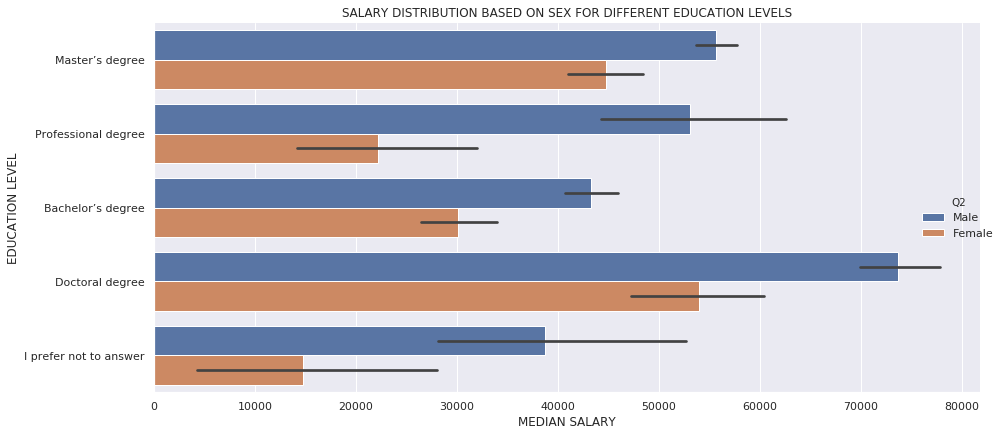

In [77]:
g=sns.catplot(x="Q10_median", y="Q4", hue="Q2", kind="bar", data=dfc);
g.fig.set_figwidth(14)
g.fig.set_figheight(6)
g.fig.tight_layout()
plt.xlabel("MEDIAN SALARY")
plt.ylabel("EDUCATION LEVEL")
plt.title("SALARY DISTRIBUTION BASED ON SEX FOR DIFFERENT EDUCATION LEVELS")
# plt.legend("SALARY DIST")
plt.show()

It can be seen from the graph that the salary increases with the level of the degree

In [78]:
#ONE HOT ENCODING
print(dfc.shape)
testQ4=pd.get_dummies(dfc["Q4"],prefix="Q4")
dfc=pd.concat([dfc,testQ4],axis=1)
print(dfc.shape)

(11778, 227)
(11778, 232)


In [79]:
dfc=dfc.drop("Q4",axis=1)
print(dfc.shape)

(11778, 231)


In [80]:
dfc=dfc.drop("Q2",axis=1)
print(dfc.shape)

(11778, 230)


# BY POSITION

Lets have a look at the mean and median of salaries for different postions to see if they can be grouped into different category

In [81]:
sal=dfc.groupby(['Q5'])['Q10_median'].mean()
sal=sal.astype(int)
sal1=sal.sort_values()
print(sal1)

Q5
Data Analyst               36099
Software Engineer          42681
Business Analyst           45096
DBA/Database Engineer      45521
Research Scientist         50737
Statistician               53112
Data Engineer              57808
Other                      58708
Data Scientist             62037
Product/Project Manager    68912
Name: Q10_median, dtype: int64


In [82]:
sal=dfc.groupby(['Q5'])['Q10_median'].median()
print(sal.sort_values())

Q5
Data Analyst               17500
Software Engineer          17500
Business Analyst           22500
Statistician               22500
DBA/Database Engineer      27500
Research Scientist         27500
Other                      31250
Data Engineer              35000
Data Scientist             45000
Product/Project Manager    45000
Name: Q10_median, dtype: int64


In [83]:
dfc["Q5"].value_counts()

Data Scientist             3510
Software Engineer          2199
Other                      1356
Data Analyst               1333
Research Scientist         1236
Business Analyst            640
Product/Project Manager     625
Data Engineer               507
Statistician                255
DBA/Database Engineer       117
Name: Q5, dtype: int64

It looks like that there is a small changes in the salary based on position. Lets one hot encode them

In [84]:
#ONE HOT ENCODING
testq5=pd.get_dummies(dfc["Q5"],prefix="Q5")
print(dfc.shape)
dfc=pd.concat([dfc,testq5],axis=1)
print(dfc.shape)


(11778, 230)
(11778, 240)


# By no of people in the company

In [85]:
sal=dfc.groupby(['Q6'])['Q10_median'].mean()
print(sal)

Q6
0-49 employees          39654.816867
1000-9,999 employees    61929.792298
250-999 employees       48081.577267
50-249 employees        46572.568194
> 10,000 employees      68075.858250
Name: Q10_median, dtype: float64


In [86]:
sal=dfc.groupby(['Q6'])['Q10_median'].median()
print(sal)

Q6
0-49 employees          12500
1000-9,999 employees    45000
250-999 employees       27500
50-249 employees        22500
> 10,000 employees      45000
Name: Q10_median, dtype: int64


The salary of the person is dependent on the size of the company   
It can be seen from the mean and median the companies with more than thousand people have significant difference in the salary for data engineers   
So we are going to feature engineer the question into two groups 
One with <1000 employees and the other with greater than 1000 employees



In [0]:
s_en={"0-49 employees": "<1000",
"1000-9,999 employees":">1000",   
"250-999 employees":"<1000",
"50-249 employees": "<1000",
"> 10,000 employees":">1000"}

In [88]:
dfc["Q6_fe"]=dfc["Q6"].map(s_en)
print(dfc["Q6_fe"].unique())

['>1000' '<1000']


Now lets one hot encode the column

In [89]:
#ONE HOT ENCODING
print(dfc.shape)
testQ6=pd.get_dummies(dfc["Q6_fe"],prefix="Q6")
dfc=pd.concat([dfc,testQ6],axis=1)
print(dfc.shape)


(11778, 241)
(11778, 243)


In [90]:
#Dropping original column after encoding
print(dfc.shape)
dfc=dfc.drop(["Q6_fe","Q6"],axis=1)
print(dfc.shape)

(11778, 243)
(11778, 241)


# Q7 Approximately how many individuals are responsible for data science workloads at your place of business?

In [91]:
print(dfc.Q7.value_counts())

20+      2786
1-2      2591
3-4      2022
5-9      1614
0        1540
10-14     858
15-19     367
Name: Q7, dtype: int64


In [92]:
sal=dfc.groupby(['Q7'])['Q5'].value_counts()
print(sal)

Q7   Q5                     
0    Software Engineer          527
     Other                      358
     Research Scientist         139
     Data Scientist             120
     Data Analyst               118
                               ... 
5-9  Data Engineer               90
     Product/Project Manager     80
     Business Analyst            67
     Statistician                32
     DBA/Database Engineer       13
Name: Q5, Length: 70, dtype: int64


The most of the people in the 0 category are working as  "Software Engineer" or in  "Other" roles in the company
There are also 122 -"Data Scientist"and 119-"Data Analyst" in this category,but they have mentioned there are 0 people responsible for datascience workload
The data is conflicting    
So we are going to drop rows with category 0

In [93]:
index=dfc[dfc["Q7"]=="0"].index
dfc=dfc.drop(index,axis=0)
print(dfc["Q7"].unique())


['20+' '3-4' '1-2' '5-9' '10-14' '15-19']


In [94]:
sal=dfc.groupby(['Q7'])['Q10_median'].mean()
print(sal)

Q7
1-2      43027.306059
10-14    55063.811189
15-19    53865.803815
20+      76761.037330
3-4      47826.038576
5-9      53658.147460
Name: Q10_median, dtype: float64


In [95]:
sal=dfc.groupby(['Q7'])['Q10_median'].median()
print(sal)

Q7
1-2      17500
10-14    35000
15-19    35000
20+      55000
3-4      27500
5-9      35000
Name: Q10_median, dtype: int64


From the mean and median salaries of people in different groups we can see that 
1-2,2-4 are in the same range   
5-9,10-14,15-19 are in the same range   
20+ has the highest salary  
So we can convert it into three groups  
Lets take the lower vaue of the ranges and encode the data

In [0]:
y_en={"1-2": 1,
      "10-14":5,
      "15-19":5,
      "20+":20,
      "3-4":1,
      "5-9":5}

In [97]:
print(dfc.shape)
dfc["Q7_e"]=dfc["Q7"].map(y_en)


(10238, 241)


In [98]:
dfc=dfc.drop(["Q7"],axis=1)
print(dfc.shape)

(10238, 241)


# ML INTO BUSSINESS

Lets have a look at the mean and median salary of samples in different categories under Q8

In [99]:
sal=dfc.groupby(['Q8'])['Q10_median'].mean()
print(sal)

Q8
I do not know                                                                                38845.945946
No (we do not use ML methods)                                                                37549.056604
We are exploring ML methods (and may one day put a model into production)                    42885.525717
We have well established ML methods (i.e., models in production for more than 2 years)       84733.867379
We recently started using ML methods (i.e., models in production for less than 2 years)      57456.422018
We use ML methods for generating insights (but do not put working models into production)    56173.178062
Name: Q10_median, dtype: float64


In [100]:
sal=dfc.groupby(['Q8'])['Q10_median'].median()
print(sal)

Q8
I do not know                                                                                12500
No (we do not use ML methods)                                                                12500
We are exploring ML methods (and may one day put a model into production)                    22500
We have well established ML methods (i.e., models in production for more than 2 years)       65000
We recently started using ML methods (i.e., models in production for less than 2 years)      35000
We use ML methods for generating insights (but do not put working models into production)    35000
Name: Q10_median, dtype: int64


There is a significant difference if the company has used ML for more than 2 years  
All these options are important so we will go with one hot encoding

In [101]:
#ONE HOT ENCODING
print(dfc.shape)
testQ8=pd.get_dummies(dfc["Q8"],prefix="Q8")
dfc=pd.concat([dfc,testQ8],axis=1)
print(dfc.shape)


(10238, 241)
(10238, 247)


In [102]:
dfc=dfc.drop("Q8",axis=1)
print(dfc.shape)

(10238, 246)


# Q1 WHAT IS YOUR AGE


In [103]:
sal=dfc.groupby(['Q1'])['Q10_median'].mean()
print(sal)

Q1
18-21     23033.444816
22-24     20682.318415
25-29     37843.205575
30-34     58023.103113
35-39     70417.262330
40-44     79906.086044
45-49     85287.277147
50-54     91159.436009
55-59    109685.823755
60-69    103778.325123
70+      105453.488372
Name: Q10_median, dtype: float64


Age has a direct correlation with the salary so we will modify the feature 

In [0]:
a_en={"18-21":18,
"22-24":22,
"25-29":25,
"30-34":30,
"35-39":35,
"40-44":40,
"45-49":45,
"50-54":50,
"55-59":55,
"60-69":60,
"70+":70}

In [105]:
dfc["Q1_e"]=dfc["Q1"].map(a_en)
print(dfc.shape)

(10238, 247)


In [106]:
dfc=dfc.drop("Q1",axis=1)
print(dfc.shape)

(10238, 246)


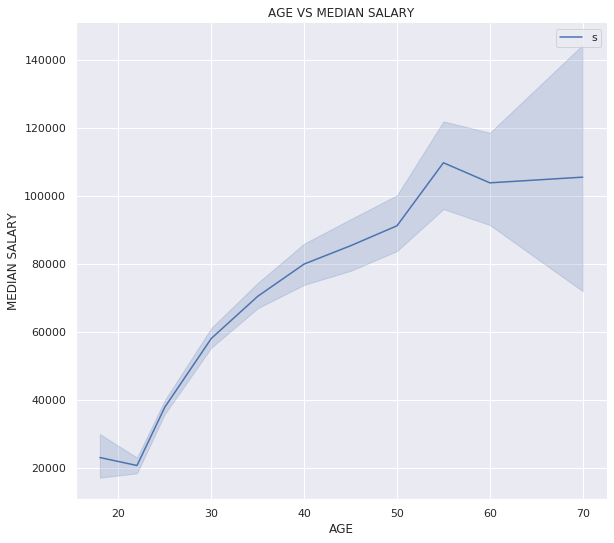

In [107]:
g=sns.relplot(x="Q1_e", y="Q10_median", data=dfc,kind="line");
g.fig.set_figwidth(10)
g.fig.set_figheight(8)
plt.xlabel("AGE")
plt.ylabel("MEDIAN SALARY")
plt.title("AGE VS MEDIAN SALARY")
plt.legend("s")
plt.show()


When we fit a line to the samples we can understand that as the age increases the salary also incerases untill the age of 55.   
It has a positive correlation with the salary   
The shaded region represents the Confidence interval. It tells that 95 percent of samples lies in the shaded region

# Time from Start to Finish (seconds)

 TIME TO FINISH HAS NO RELEVANCE TO THE SALARY OF PERSON    
 SO WE DROP THE COLUMN

In [0]:
dfc=dfc.drop("Time from Start to Finish (seconds)",axis=1)

In [0]:
# print(np.array(dfc.columns))

ON FURTHER INSPECTION OF COLUMNS OF THE DATAFRAME WE CAN SAY THAT THE COLUMNS 'Q5' AND 'Q10_buckets' ARE NOT NEEDED   
WE CAN DROP THEM

In [110]:
dfc=dfc.drop(['Q5', 'Q10_buckets','Q10_median'],axis=1)
print(dfc.shape)

(10238, 242)


# dfc is the completely encoded dataframe which can be passed into ML algorithm, but before that lets see if we can decrease the number of features
# There are no NAN values in the whole DataFrame

BEFORE PASSING THE DATAFRAME INTO SOME AUTO FEATURE SELECTION ALGORITHM, LETS MANUALLY INSPECT THE QUESTIONS TO SEE IF WE CAN ELIMINATE ANY FEATURES   



# Q12	Who/what are your favorite media sources that report on data science topics? (Select all that apply) - Selected Choice
 Favourite media source varies from person to person,it cannot have relation with the salary of the person- So we will drop it 

Q18	What programming languages do you use on a regular basis? (Select all that apply) - Selected Choice

# Q19	What programming language would you recommend an aspiring data scientist to learn first? - Selected Choice
 The programming language which is being used by them determines their salary, the recommended programing languages will be the programming language they are using(which was answered in Q18) or in some cases it will be the language which might help them to go to the next stage  but it doesn't have relation with the present salary.   

# Q29	Which of the following cloud computing platforms do you use on a regular basis? (Select all that apply) - Selected Choice
 The next question deals with the specific cloud computing product that are used by the person, this question deals with cloud computing platform which is the generalized form of the next question, So we can drop this column   
 
Q30	Which specific cloud computing products do you use on a regular basis? (Select all that apply) - Selected Choice



In [111]:
l=[]
c1=[i for i  in dfc.columns if "Q12" in i]
c2=[i for i  in dfc.columns if "Q19" in i]
c3=[i for i  in dfc.columns if "Q29" in i]
l=c1+c2+c3
l=np.array(l)
print(l.shape)

(25,)


In [112]:
dfc=dfc.drop(l,axis=1)
dfc.shape

(10238, 217)

Now lets split the data into features and target

In [0]:
y=dfc["Q10_Encoded"]
x=dfc.drop("Q10_Encoded",axis=1)

#FEATURE SELECTION:
Feature selection is done to reduce the size of data frame fed to Machine learing algorithm.  
It is important because there might be some irrelevent features(with regards to predicting target) in the dataset that can be removed thereby decresing the computational time of our model.  

**Feature engineering** is a techinque where new features are engineered based on the existing features.It can used to reduce the no of features in dataset and in some cases of classification problem feature engineering is required to sperate classes which not seperable(eg EXOR gate classification).

# OUR DATASET IS READY
- There are no NAN values   
- All the columns are encoded   
Next we have to select the features    
First, Lets calculate the correlation of the features with target and try to filter features based on correlation

In [114]:
corr=x.apply(lambda x: x.corr(y))
print(corr.shape)
abs_corr=abs(corr)
releveant_features=abs_corr[abs_corr>0.5]# Threshold 0.5 of absolute value,We need features with strong correlation(positive or negative)
print(len(releveant_features))
print(releveant_features)

(216,)
1
Q3_en    0.639886
dtype: float64


 It can be seen that only one feature in the whole dataset has a correlation of greater than 0.5  
    
 This is because most of the data fame has one hot encoded categorical data(0 or 1) and our target is salary bracket encoded between 0 and 14.   
   
 As the salary increases from 0 to 14 the categorical data will not increase or decrease more than a step size of 1. This causes the correlation to be low

# RANDOM FOREST FOR FEATURE SELECTION

  Lets use Random forest algorithm for feature selection. They come under the category of embeded method of feature selection. 
  Random forest is a ensemble decision tree algorithm.  
  It has a set of decision trees and sections of the input dataset will be split and given to these trees and these trees classify the data into buckets in such a way that the feature is which has high importance will be at the top of the tree.   
  The feature importance is measure by purity of buckets(decrese in impurity) resulting after classification of datset by the feature in the tree.   
  For classification problems, the measure of impurity is the Gini impurity or the information gain entropy.   
For regression the measure of impurity is variance.   
When training a tree, it is possible to compute how much each feature decreases the impurity. Thus we are able to select the features.

We go for random forest method of feature selection because they are highly accurate and generalize better(less chances of overfitting data) 

In [0]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel

In [116]:
sel = SelectFromModel(RandomForestClassifier(n_estimators = 100))#100 trees in forest
sel.fit(x, y)

SelectFromModel(estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                                 class_weight=None,
                                                 criterion='gini',
                                                 max_depth=None,
                                                 max_features='auto',
                                                 max_leaf_nodes=None,
                                                 max_samples=None,
                                                 min_impurity_decrease=0.0,
                                                 min_impurity_split=None,
                                                 min_samples_leaf=1,
                                                 min_samples_split=2,
                                                 min_weight_fraction_leaf=0.0,
                                                 n_estimators=100, n_jobs=None,
                                                 oob_score=False,

 The random forest algorithm returns an array **feature_importances_** which describes the importance of feature for the prediction of target variable accurately
   
   Now lets **plot a bar graph** based on the feature importance array to **Visualize the order of feature importance**

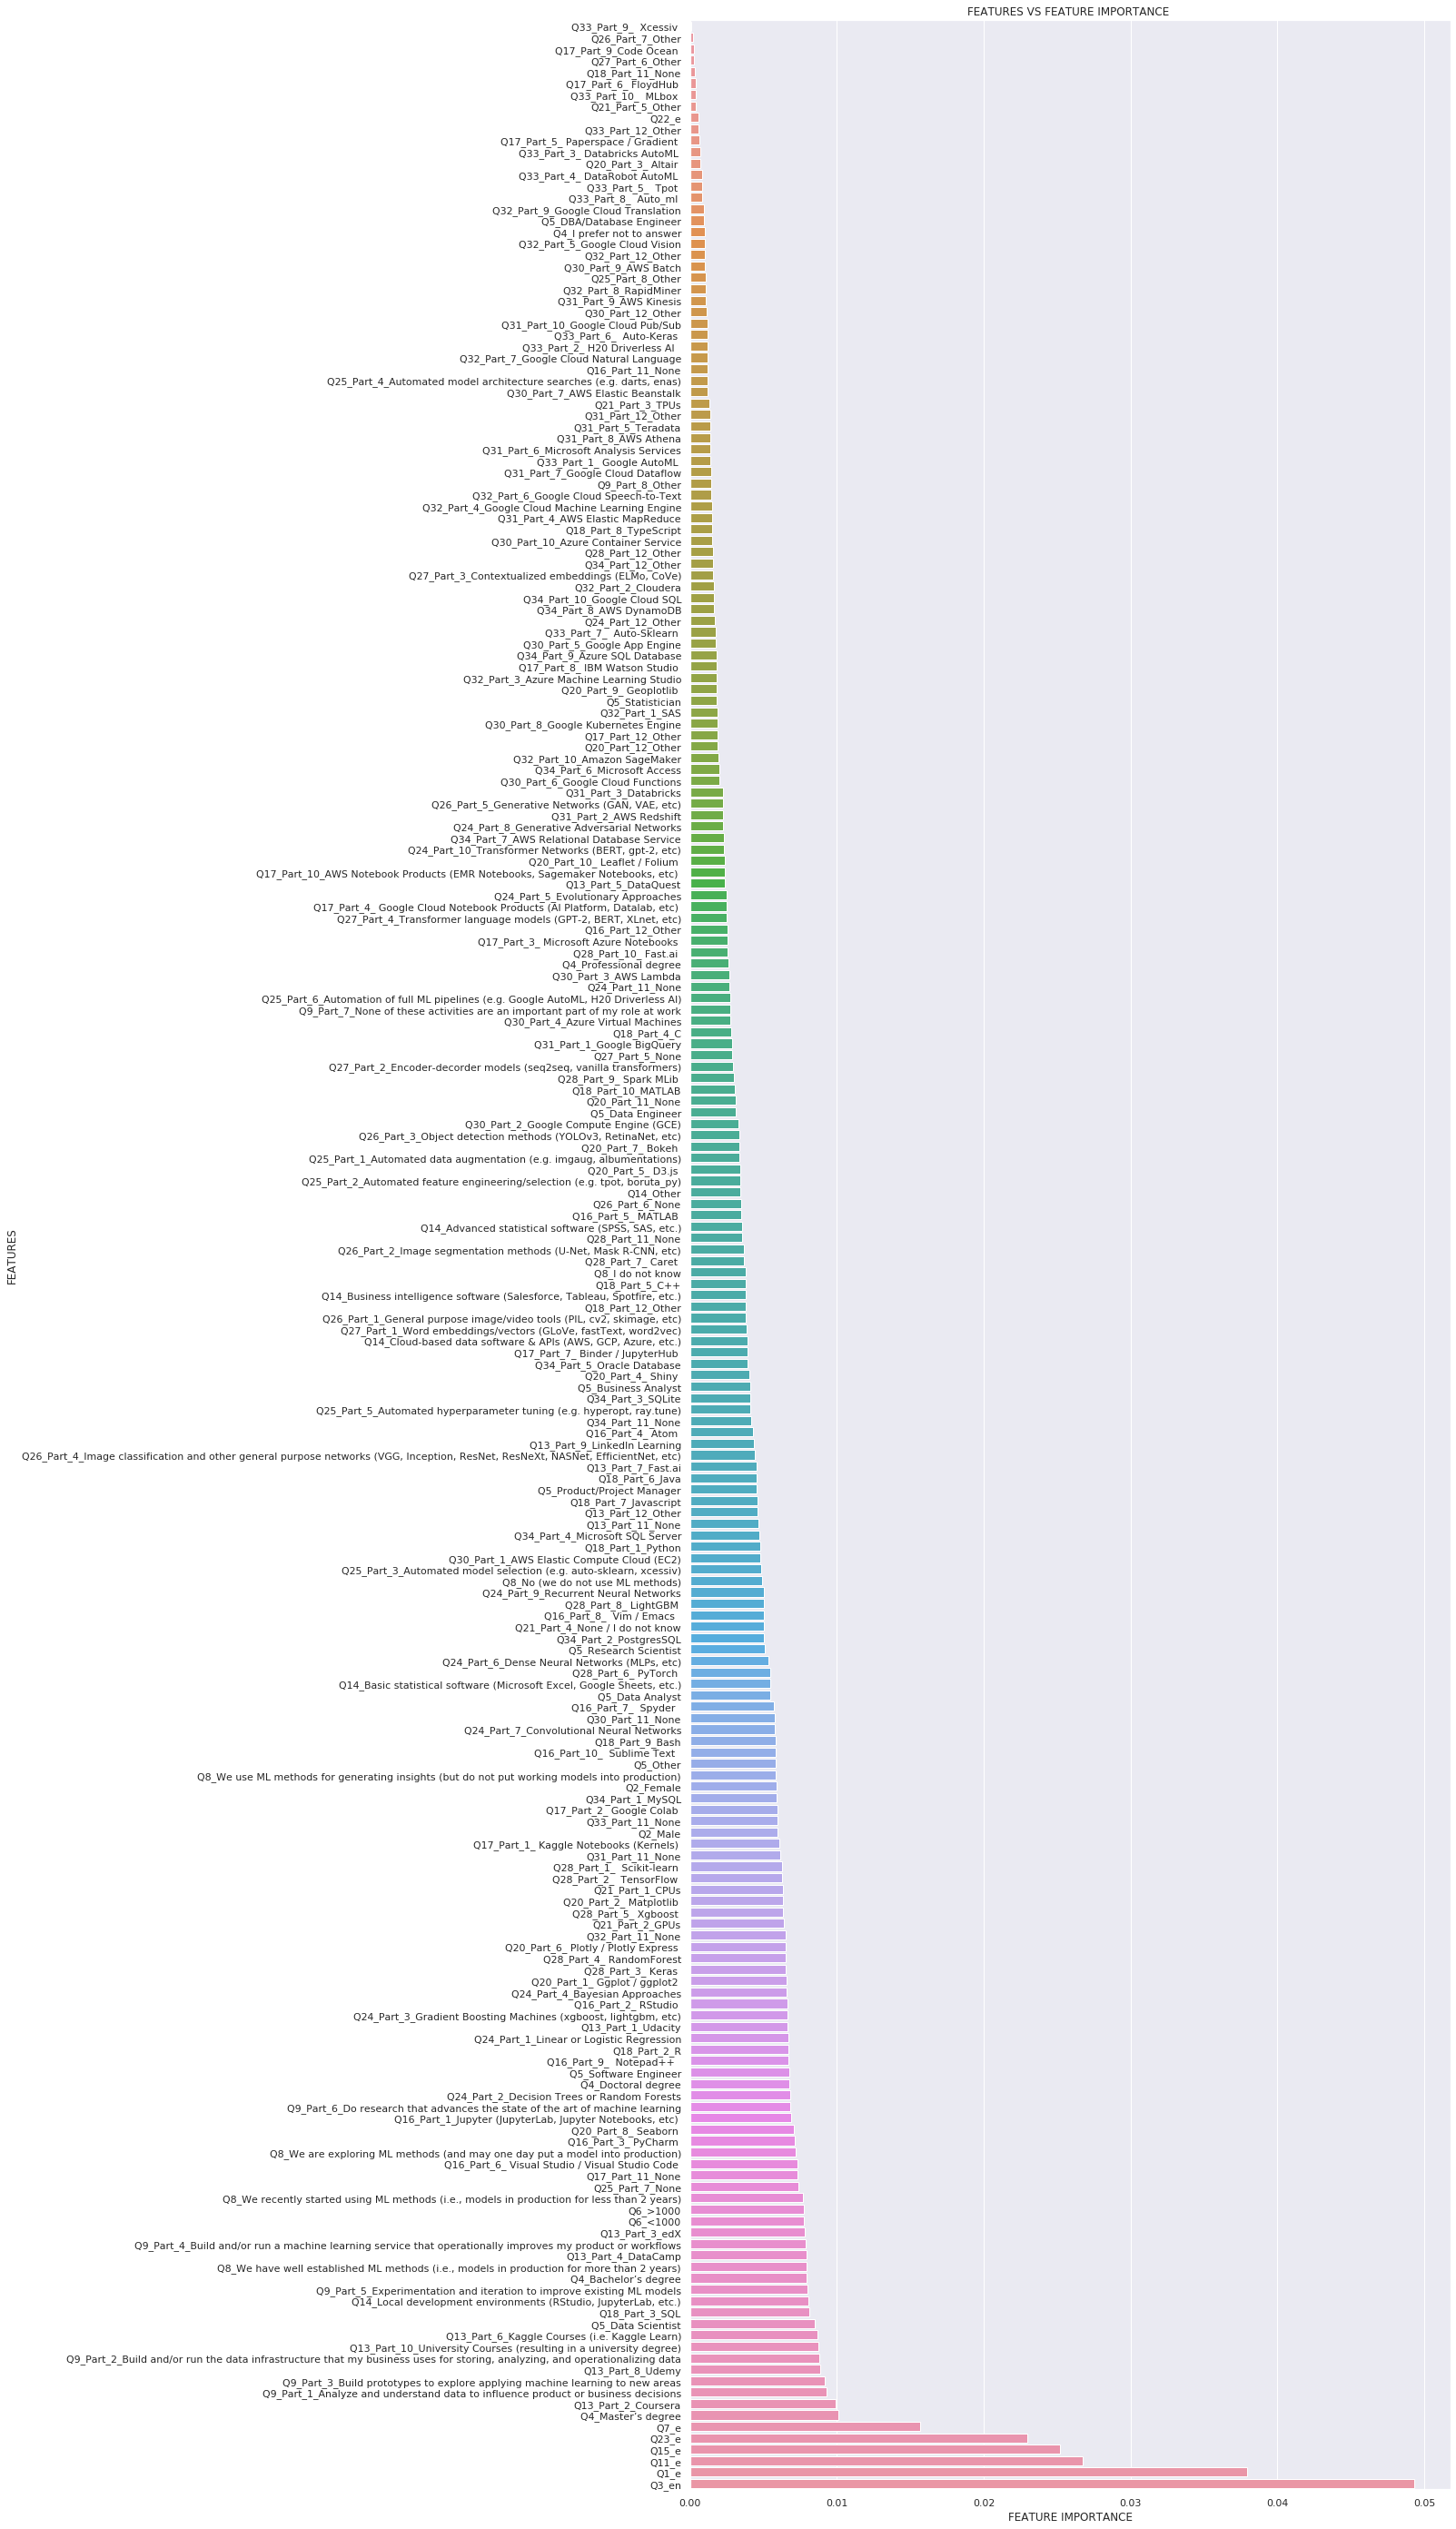

In [117]:
coef = pd.Series(sel.estimator_.feature_importances_, index = x.columns)
imp_coef = coef.sort_values()
sns.set(rc={'figure.figsize':(15,70)})
sns.barplot(x=imp_coef.values,y=imp_coef.index)
plt.xlabel("FEATURE IMPORTANCE")
plt.ylabel("FEATURES")
plt.title("FEATURES VS FEATURE IMPORTANCE ")
plt.show()

**Q3_en**(COUNTRIES ENCOED INTO DIFFERENT CATEGORY BASED ON INCOME LEVELS) and Q1_e (AGE) have significantly higher feature importance compared to the rest of the features

In [118]:
#Selected features
selected_feat1= x.columns[(sel.get_support())]
print("Length of Selected features is=",len(selected_feat1))

Length of Selected features is= 85


OUR FEATURE SELECTION ALGORITHM RETURNS 80 ODD FEATURES WHICH HAVE REDUCED THE IMPURITY LEVEL BASED ON RANDOM FOREST ALGORITHM.  
THESE FEATURES ARE SELECTED AND LOGISTIC REGRESSION IS IMPLEMENTED ON THEM

In [119]:
print("SHAPE BEFORE FEATURE SELECTION",x.shape)
fx=x[selected_feat1]
print("SHAPE AFTER FEATURE SELECTION",fx.shape)

SHAPE BEFORE FEATURE SELECTION (10238, 216)
SHAPE AFTER FEATURE SELECTION (10238, 85)


# SPLITTING DATA INTO TRAIN AND TEST SET

In [0]:
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()
fx = scaler.fit_transform(fx)


In [121]:
from sklearn.model_selection import train_test_split
tx_train,tx_test,ty_train,ty_test=train_test_split(fx,y,test_size=0.33, random_state=42)
print(tx_train.shape)
print(tx_test.shape)
print(ty_train.shape)
print(ty_test.shape)

(6859, 85)
(3379, 85)
(6859,)
(3379,)


# MODEL IMPLEMENTATION:
  **First** lets implement **Logistic regression without cross validation and hyper parameter tuning** and **then** lets implement the** Logistic regression with hyper parameter tuning and cross validation** and lets **compare the accuracy**

In [0]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold
from sklearn.metrics import make_scorer, confusion_matrix
from sklearn.model_selection import learning_curve
from sklearn.metrics import accuracy_score, mean_squared_error

In [123]:
# Lets look at the counts of unique data in the target
print("Target counts\n",ty_train.value_counts())
# ENCODING TARGET TRAIN DATA INTO 1'S AND 0'S FOR THE 14 LOGISTIC REGRESSION WHICH WILL BE IMPLEMETED 
yl=[]
a=ty_train.shape[0]
for k in range(0,14):
    y2=np.random.rand(a)
    y2[ty_train<=k]=0
    y2[ty_train>k]=1

    print("Regression",k+1,"target data counts=",np.unique(y2,return_counts=True))
    yl.append(y2)

yl=np.array(yl)


Target counts
 0     2081
1      751
2      564
10     430
4      390
5      388
3      385
6      317
11     301
7      300
12     266
8      232
9      206
14     144
13     104
Name: Q10_Encoded, dtype: int64
Regression 1 target data counts= (array([0., 1.]), array([2081, 4778]))
Regression 2 target data counts= (array([0., 1.]), array([2832, 4027]))
Regression 3 target data counts= (array([0., 1.]), array([3396, 3463]))
Regression 4 target data counts= (array([0., 1.]), array([3781, 3078]))
Regression 5 target data counts= (array([0., 1.]), array([4171, 2688]))
Regression 6 target data counts= (array([0., 1.]), array([4559, 2300]))
Regression 7 target data counts= (array([0., 1.]), array([4876, 1983]))
Regression 8 target data counts= (array([0., 1.]), array([5176, 1683]))
Regression 9 target data counts= (array([0., 1.]), array([5408, 1451]))
Regression 10 target data counts= (array([0., 1.]), array([5614, 1245]))
Regression 11 target data counts= (array([0., 1.]), array([6044,  8

By cross checking the counts of 1's and 0's we can see that the target labels have been encoded correctly



In [124]:
yl=np.array(yl)# target data for different logistic regressions

# LR WITH DEFAULT PARAMETER OF CVAL AND SOLVER
cval=1
model0 = LogisticRegression(C=cval, solver = 'liblinear')
model1 = LogisticRegression(C=cval, solver = 'liblinear')
model2 = LogisticRegression(C=cval, solver = 'liblinear')
model3 = LogisticRegression(C=cval, solver = 'liblinear')
model4 = LogisticRegression(C=cval, solver = 'liblinear')
model5 = LogisticRegression(C=cval, solver = 'liblinear')
model6 = LogisticRegression(C=cval, solver = 'liblinear')
model7 = LogisticRegression(C=cval, solver = 'liblinear')
model8 = LogisticRegression(C=cval, solver = 'liblinear')
model9 = LogisticRegression(C=cval, solver = 'liblinear')
model10 = LogisticRegression(C=cval, solver = 'liblinear')
model11 = LogisticRegression(C=cval, solver = 'liblinear')
model12 = LogisticRegression(C=cval, solver = 'liblinear')
model13 = LogisticRegression(C=cval, solver = 'liblinear')

#LETS STORE THE MODELS AS LIST
modellist=[model0,model1,model2,model3,model4,model5,model6,model7,model8,model9,model10,model11,model12,model13]

#LETS CREATE A DICTIONARY TO STORE THE PROBABLITY OF SAMPLES BELONGING TO CATEGORIES 0 AND 1 
p_dict={}


for i in range (0,14):
    m=modellist[i]
    m.fit(tx_train,yl[i,:])# MODEL FITTING
    pl=m.predict_proba(tx_test)# PROBABLITY PREDICTION
    p_dict[i]=pl#STORAGE

# CALCULATION TO FIND THE PROBABLITY OF A SAMPLE BELONGING TO ONE OF THE 15 CLASSES(0-14)
p0=p_dict[0]
p1=p_dict[1]-p_dict[0]
p2=p_dict[2]-p_dict[1]
p3=p_dict[3]-p_dict[2]
p4=p_dict[4]-p_dict[3]
p5=p_dict[5]-p_dict[4]
p6=p_dict[6]-p_dict[5]
p7=p_dict[7]-p_dict[6]
p8=p_dict[8]-p_dict[7]
p9=p_dict[9]-p_dict[8]
p10=p_dict[10]-p_dict[9]
p11=p_dict[11]-p_dict[10]
p12=p_dict[12]-p_dict[11]
p13=p_dict[13]-p_dict[12]
p14=p_dict[13]

#SLICING THE REQUIRED PROBABLITY
p0=p0[:,0]
p1=p1[:,0]
p2=p2[:,0]
p3=p3[:,0]
p4=p4[:,0]
p5=p5[:,0]
p6=p6[:,0]
p7=p7[:,0]
p8=p8[:,0]
p9=p9[:,0]
p10=p10[:,0]
p11=p11[:,0]
p12=p12[:,0]
p14=p13[:,1]
p13=p13[:,0]

# CREATING A LIST BASED ON PROBABLITY
plst=[p0,p1,p2,p3,p4,p5,p6,p7,p8,p9,p10,p11,p12,p13,p14]
plst=np.array(plst)

# CONVERTING PROBAABLITIES TO TARGET LABELS
target=np.argmax(plst,axis=0)

#CALCULATING ACCURACY
acc1=accuracy_score(ty_test, target)
print("ACCURACY=",acc1*100)


ACCURACY= 32.4060372891388


# MODEL TUNING: 
FINDING THE OPTIMAL MODEL FOR ALL 14 REGRESSION USING THE CUSTOM FUNCTION DEFINED BELOW 

In [0]:
# FUNCTION TO PERFORM CV AND HYPER PARAMETER TUNING AND CAPTURE THE BEST MODEL
def cv_gs(X,y):  
  model = LogisticRegression()
  kfold = KFold(n_splits=10) #10 FOLD CV
  kfold.get_n_splits(X)

  best_model = model
  best_params = {}
  best_accuracy = 0
  best_std = 0

  for C in [0.001,0.005,0.01,0.1,1]:
      for solver in ['newton-cg','lbfgs','liblinear']:
          
          model = LogisticRegression(C=C, solver=solver)
          accuracy = np.zeros(10)
          np_idx = 0
          
          for train_idx, test_idx in kfold.split(X):
              X_train, X_test = X[train_idx], X[test_idx]
              y_train, y_test = y[train_idx], y[test_idx]

              model.fit(X_train, y_train) #FITTING DATA TO MODEL

              predictions = model.predict(X_test)# TESTING THE MODEL
              ACC= accuracy_score(y_test,predictions)

              accuracy[np_idx] = ACC*100 # STORING THE ACCURACY AS ARRAY
              np_idx += 1

          #IF THE ACCUARY OF A GIVEN C AND SOLVER IS GREATER THAN THE PREVIOUS BEST ACCURACY THE NEW MODEL PARAMETERS ARE CAPTURED HERE
          if np.mean(accuracy) > best_accuracy:
              best_model = model
              best_params = {'C':C, 'solver':solver}
              best_accuracy = np.mean(accuracy)
              best_std = np.std(accuracy)

  print (best_params)
  print ("Best Score: {}% STD({}%)".format(round(best_accuracy,3),round(best_std,3)))      
  print ("\nThe optimal log model uses C={}, and a {} solver, and has a cross validation score of {}% with a standard deviation of {}%".format(best_params['C'],best_params['solver'],round(best_accuracy,3),round(best_std,3)))
  return best_model #THE FUNCTION RETURNS THE BEST MODEL AFTER GRID SEARCH AND CV

In [126]:
opt_model0=cv_gs(tx_train,yl[0,:])
print(opt_model0)


{'C': 0.005, 'solver': 'newton-cg'}
Best Score: 79.006% STD(0.702%)

The optimal log model uses C=0.005, and a newton-cg solver, and has a cross validation score of 79.006% with a standard deviation of 0.702%
LogisticRegression(C=0.005, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='newton-cg', tol=0.0001, verbose=0,
                   warm_start=False)


In [127]:
opt_model1=cv_gs(tx_train,yl[1,:])
print("\n",opt_model1)

{'C': 0.005, 'solver': 'newton-cg'}
Best Score: 80.405% STD(1.848%)

The optimal log model uses C=0.005, and a newton-cg solver, and has a cross validation score of 80.405% with a standard deviation of 1.848%

 LogisticRegression(C=0.005, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='newton-cg', tol=0.0001, verbose=0,
                   warm_start=False)


In [128]:
opt_model2=cv_gs(tx_train,yl[2,:])
print("\n",opt_model2)

{'C': 0.005, 'solver': 'newton-cg'}
Best Score: 82.257% STD(1.406%)

The optimal log model uses C=0.005, and a newton-cg solver, and has a cross validation score of 82.257% with a standard deviation of 1.406%

 LogisticRegression(C=0.005, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='newton-cg', tol=0.0001, verbose=0,
                   warm_start=False)


In [129]:
opt_model3=cv_gs(tx_train,yl[3,:])
print("\n",opt_model3)

{'C': 0.1, 'solver': 'liblinear'}
Best Score: 82.855% STD(1.907%)

The optimal log model uses C=0.1, and a liblinear solver, and has a cross validation score of 82.855% with a standard deviation of 1.907%

 LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)


In [130]:
opt_model4=cv_gs(tx_train,yl[4,:])
print("\n",opt_model4)

{'C': 0.1, 'solver': 'liblinear'}
Best Score: 83.482% STD(1.692%)

The optimal log model uses C=0.1, and a liblinear solver, and has a cross validation score of 83.482% with a standard deviation of 1.692%

 LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)


In [131]:
opt_model5=cv_gs(tx_train,yl[5,:])
print("\n",opt_model5)

{'C': 1, 'solver': 'liblinear'}
Best Score: 83.89% STD(1.38%)

The optimal log model uses C=1, and a liblinear solver, and has a cross validation score of 83.89% with a standard deviation of 1.38%

 LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)


In [132]:
opt_model6=cv_gs(tx_train,yl[6,:])
print("\n",opt_model6)

{'C': 0.01, 'solver': 'newton-cg'}
Best Score: 83.934% STD(1.278%)

The optimal log model uses C=0.01, and a newton-cg solver, and has a cross validation score of 83.934% with a standard deviation of 1.278%

 LogisticRegression(C=0.01, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='newton-cg', tol=0.0001, verbose=0,
                   warm_start=False)


In [133]:
opt_model7=cv_gs(tx_train,yl[7,:])
print("\n",opt_model7)

{'C': 0.01, 'solver': 'newton-cg'}
Best Score: 84.75% STD(1.25%)

The optimal log model uses C=0.01, and a newton-cg solver, and has a cross validation score of 84.75% with a standard deviation of 1.25%

 LogisticRegression(C=0.01, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='newton-cg', tol=0.0001, verbose=0,
                   warm_start=False)


In [134]:
opt_model8=cv_gs(tx_train,yl[8,:])
print("\n",opt_model8)

{'C': 0.1, 'solver': 'liblinear'}
Best Score: 86.12% STD(1.221%)

The optimal log model uses C=0.1, and a liblinear solver, and has a cross validation score of 86.12% with a standard deviation of 1.221%

 LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)


In [135]:
opt_model9=cv_gs(tx_train,yl[9,:])
print("\n",opt_model9)

{'C': 1, 'solver': 'newton-cg'}
Best Score: 87.053% STD(1.165%)

The optimal log model uses C=1, and a newton-cg solver, and has a cross validation score of 87.053% with a standard deviation of 1.165%

 LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='newton-cg', tol=0.0001, verbose=0,
                   warm_start=False)


In [136]:
opt_model10=cv_gs(tx_train,yl[10,:])
print("\n",opt_model10)

{'C': 1, 'solver': 'newton-cg'}
Best Score: 90.101% STD(0.894%)

The optimal log model uses C=1, and a newton-cg solver, and has a cross validation score of 90.101% with a standard deviation of 0.894%

 LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='newton-cg', tol=0.0001, verbose=0,
                   warm_start=False)


In [137]:
opt_model11=cv_gs(tx_train,yl[11,:])
print("\n",opt_model11)

{'C': 1, 'solver': 'liblinear'}
Best Score: 93.089% STD(0.732%)

The optimal log model uses C=1, and a liblinear solver, and has a cross validation score of 93.089% with a standard deviation of 0.732%

 LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)


In [138]:
opt_model12=cv_gs(tx_train,yl[12,:])
print("\n",opt_model12)

{'C': 0.01, 'solver': 'newton-cg'}
Best Score: 96.457% STD(0.517%)

The optimal log model uses C=0.01, and a newton-cg solver, and has a cross validation score of 96.457% with a standard deviation of 0.517%

 LogisticRegression(C=0.01, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='newton-cg', tol=0.0001, verbose=0,
                   warm_start=False)


In [139]:
opt_model13=cv_gs(tx_train,yl[13,:])
print("\n",opt_model13)

{'C': 0.001, 'solver': 'newton-cg'}
Best Score: 97.901% STD(0.3%)

The optimal log model uses C=0.001, and a newton-cg solver, and has a cross validation score of 97.901% with a standard deviation of 0.3%

 LogisticRegression(C=0.001, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='newton-cg', tol=0.0001, verbose=0,
                   warm_start=False)


# The optimal model with Cval, solver, cross validation score with standard deviation

MODEL0{'C': 0.005, 'solver': 'newton-cg'}Best Score: 79.093% STD(0.641%)

MODEL1{'C': 0.005, 'solver': 'liblinear'}Best Score: 80.434% STD(1.911%)

MODEL2{'C': 0.1, 'solver': 'liblinear'}Best Score: 82.242% STD(1.295%)

MODEL3{'C': 0.01, 'solver': 'newton-cg'}Best Score: 82.884% STD(1.844%)

MODEL4{'C': 0.1, 'solver': 'newton-cg'}Best Score: 83.511% STD(1.767%) 

MODEL5 {'C': 0.1, 'solver': 'newton-cg'}Best Score: 83.919% STD(1.372%)

MODEL6{'C': 0.01, 'solver': 'newton-cg'}Best Score: 83.89% STD(1.35%)

MODEL7{'C': 0.01, 'solver': 'liblinear'}Best Score: 84.735% STD(1.224%)

MODEL8{'C': 0.1, 'solver': 'newton-cg'}Best Score: 86.004% STD(1.142%)

MODEL9{'C': 1, 'solver': 'liblinear'}Best Score: 87.17% STD(1.222%)

MODEL10{'C': 1, 'solver': 'newton-cg'}Best Score: 90.115% STD(0.963%)

MODEL11{'C': 0.1, 'solver': 'newton-cg'}Best Score: 93.089% STD(0.735%)

MODEL12 {'C': 0.005, 'solver': 'newton-cg'}Best Score: 96.399% STD(0.479%)

MODEL13 {'C': 0.005, 'solver': 'newton-cg'}  Best Score: 97.915% STD(0.299%)


# TESTING & DISCUSSION:

In [140]:
# LR WITH OPTIMAL PARAMETER OF CVAL AND SOLVER
modellist1=[opt_model0,opt_model1,opt_model2,opt_model3,opt_model4,opt_model5,opt_model6,opt_model7,opt_model8,opt_model9,opt_model10,opt_model11,opt_model12,opt_model13]

p_dict={}
for i in range (0,14):
    m=modellist1[i]
    pl=m.predict_proba(tx_test)
    p_dict[i]=pl

# CALCULATION TO FIND THE PROBABLITY OF A SAMPLE BELONGING TO ONE OF THE 15 CLASSES(0-14)
p0=p_dict[0]
p1=p_dict[1]-p_dict[0]
p2=p_dict[2]-p_dict[1]
p3=p_dict[3]-p_dict[2]
p4=p_dict[4]-p_dict[3]
p5=p_dict[5]-p_dict[4]
p6=p_dict[6]-p_dict[5]
p7=p_dict[7]-p_dict[6]
p8=p_dict[8]-p_dict[7]
p9=p_dict[9]-p_dict[8]
p10=p_dict[10]-p_dict[9]
p11=p_dict[11]-p_dict[10]
p12=p_dict[12]-p_dict[11]
p13=p_dict[13]-p_dict[12]
p14=p_dict[13]

#SLICING THE REQUIRED PROBABLITY
p0=p0[:,0]
p1=p1[:,0]
p2=p2[:,0]
p3=p3[:,0]
p4=p4[:,0]
p5=p5[:,0]
p6=p6[:,0]
p7=p7[:,0]
p8=p8[:,0]
p9=p9[:,0]
p10=p10[:,0]
p11=p11[:,0]
p12=p12[:,0]
p14=p13[:,1]
p13=p13[:,0]

# CREATING A LIST BASED ON PROBABLITY
plist=[p0,p1,p2,p3,p4,p5,p6,p7,p8,p9,p10,p11,p12,p13,p14]
plist=np.array(plist)

# CONVERTING PROBABLITIES TO TARGET LABELS
target1=np.argmax(plist,axis=0)

#CALCULATING ACCURACY
acc2=accuracy_score(ty_test, target1)
print("ACCURACY AFTER OPTIMIZATION=",acc2*100)

print("ACCURACY HAS INCREASED BY",round(((acc2-acc1)*100),3),"PERCENTAGE")


ACCURACY AFTER OPTIMIZATION= 32.11009174311927
ACCURACY HAS INCREASED BY -0.296 PERCENTAGE


  WE CAN SEE AFTER HYPERPARAMETER OPTIMIZATION AND AND CROSS VALIDATION THE MODEL PERFORMS POORLY COMPARED TO THE DEFAULT VALUES OF LOGISTIC REGRESSION.
  THIS IS BECAUSE THE MODEL IS **OVERFITTED** 
  IT HAS LOW BIAS AND HIGH VARIANCE

  LETS HAVE A LOOK AT THE DISTRIBUTION OF THE PREDICTED LABELS VS THE ORIGINAL TARGET LABELS

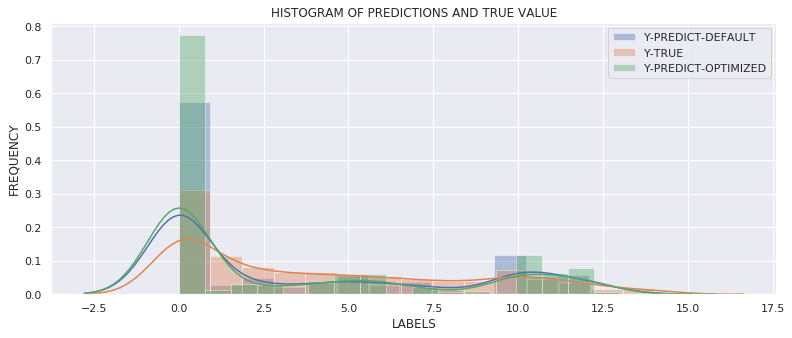

In [151]:

sns.set(rc={'figure.figsize':(13,5)})
sns.distplot(target,label="Y-PREDICT-DEFAULT")
sns.distplot(ty_test,label="Y-TRUE")
sns.distplot(target1,label="Y-PREDICT-OPTIMIZED")

plt.xlabel("LABELS")
plt.ylabel("FREQUENCY")
plt.title("HISTOGRAM OF PREDICTIONS AND TRUE VALUE")
plt.legend()
plt.show()

 FROM THE DISTRIBUTION WE SHOULD ALSO NOTICE THAT **THE DATA SET DOES NOT HAVE A BALANCED DISTRIBUTION**.THE **LABEL 0 HAS A FREQUECY** OF 0.3 WHICH IS **3 TIMES HIGHER** THAN THE MAXIMUM FREQUENCY OF REST OF THE LABLES

 FROM THE DISTRIBUTION OF PREDICTED VALUES WE CAN SEE THAT ALOT OF LAELS WERE MISCLASSIFIED AS 0 LABELS.
    
  THIS IS BECAUSE IN ADDITION TO HAVING A IMBALANCED DATASET IN ALL THE 14 LOGISTIC REGRESSION MODELS WE CALCULATED THE PROBABLITY OF A SAMPLE BELONGING TO A CLASS 0 (WHICH INCLUDED LABEL 0,1,2 TILL 13 AS PER THE MODEL TRAINED).ALL THESE 14 MODELS INCLUDE THE LABEL 0 (UNDER CLASS 0) IN THEM AND THIS HAS RESULTED IN THE MISPREDICTION OF LABELS

  WHEN WE OPTIMIZE THE INDIVIDUAL MODELS IT RESULTS IN THE MISSCLASSIFICATION OF LABEL 0 TO INCREASE AS SEEN IN TH HISTOGRAM.

  THE HYPER PARAMETER TUNING AND CROSS VALIDATION HAS FINED TUNED EACH MODEL FOR BETTER PERFORMANCE OF INDIVIDUAL ENCODED TARGETS WHICH RESULTED IN THE DECRASE IN OVERALL ACCURACY BECAUSE THE OVERALL MODEL FOR DEFAULT VALUES OF LOGISTIC REGRESSION HYPERPARAMETERS IS OVERFIT BY ITSELF AND THIS FINE TUNING FURTHER INCRESED THE OVERFITTING(DECREASED THE BIAS INCREASED THE VARIANCE)

